# importing Libraries


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt  

#### pandas help to importing data and also help in data manipulation. numpy contains multidimensonal array which consume less space &  Numpy and Pandas are helpful for manipulating the dataframe also. Seaborn used to data visualization and exploratory data analysis then matplotlib.pyplot is a plotting library used for 2D graphics

# PART 1. Describe the data used and how you got the data

### First I download data from kaggle.com, then there were 3 csv file, so I import data files with pandas read command

In [2]:
training = pd.read_csv('train.csv')
testing = pd.read_csv('test.csv')

# PART 2. Initial Exploration of the data 

len(training)

In [3]:
training.index

RangeIndex(start=0, stop=891, step=1)

In [4]:
training.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
training.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
training.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


### dealing with null value and missing values

<AxesSubplot:>

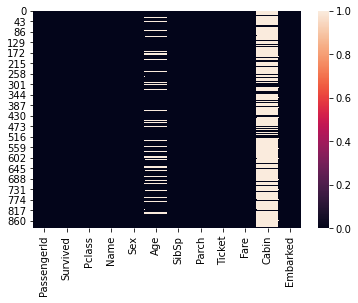

In [9]:
sns.heatmap(training.isna())

##### finiding how many columns in train and test set as missing values

In [10]:

def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum()) 
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


#### Droping Cabin and Ticket column at first, I don't need them for my model, inplace= true to drop them permanently

In [11]:

training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


#### filling the missing or null values, and we are using inpalce= True so that it would change permentantly  
#### for Age and Fare columns in trainig and test set we are replace missing values with the columns median
#### And for Embarked we are Filling missing values with 'S' 

In [12]:

training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 
training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [13]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


#### I'm assign values in Embaraked column ,like categorization, assigning them a integer value

In [14]:
training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2



In [15]:
training.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [16]:
testing.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [17]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


### Sex column is important for my model, But its a object type. As working with object type column it will create problem and it won't help me too much. That's why with the help of mao fuction I convert object type to integer type.

In [18]:
genderMap = {"male":0, "female":1}
data = [training, testing]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genderMap)

In [19]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


In [20]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


# 3 correlation of data attributes

In [21]:
corr_matrix = training.corr()
corr_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333
Age,0.034212,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000


### here we can see correlation between each column with all other column, we can get a view about which one has strong correlation with which column.

### Here my main output or target value is Survived column, If I calculate correlation for target column [Survived ] then I can which attribute has most effects on target column

In [22]:
print('Correlation With Target column- Survived:\n')
corr_matrix["Survived"].sort_values(ascending=False)

Correlation With Target column- Survived:



Survived       1.000000
Sex            0.543351
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Pclass        -0.338481
Name: Survived, dtype: float64

### From this correlation part I can say that Sex column has a large positive correlation value, so it  is strongly correlated with survive columne and Pclass has negative correlation value, so it is in negativly it is also correlated strongly with survive column.

###### countplot of survived vs not survived with respect to Sex, Age & Pclass

<AxesSubplot:xlabel='Survived', ylabel='count'>

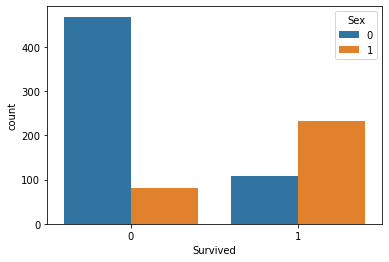

In [23]:
sns.countplot(x='Survived',data=training,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

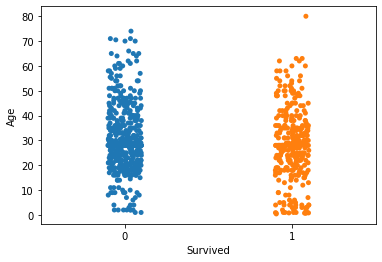

In [24]:
sns.stripplot(x="Survived", y="Age", data=training, jitter=True)


<AxesSubplot:xlabel='Survived', ylabel='count'>

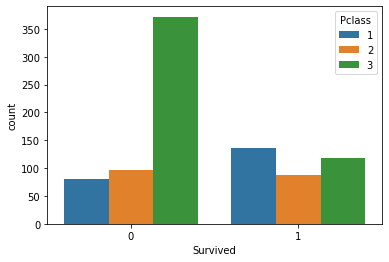

In [25]:
sns.countplot(x='Survived',data=training,hue='Pclass')

In [26]:
# Together

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

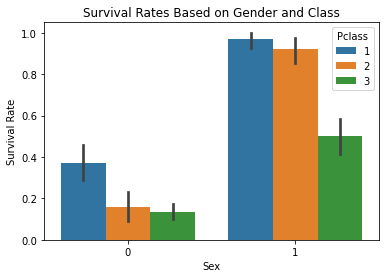

In [27]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

##### Survival Rates Based on Gender and Class gives me more information data about the Survival . Here 0 indicates Male, 1 indicates Female

# 4 New features

### Adding two new features, FamSize and IsAlone column, I'm adding it because it can contribute on prediction for survival as Family and Alone person's different perceftion for survival

In [28]:
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1
training["IsAlone"] = training.FamSize.apply(lambda x: 1 if x == 1 else 0)
testing["IsAlone"] = testing.FamSize.apply(lambda x: 1 if x == 1 else 0)

In [29]:
training.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,1,1


In [30]:
testing.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,2,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,0,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,2,1,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,0,3,0


# 5 Classification Model fitting and training 

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score


#### Here I will use three Model, and see which one give me most accurate prediction

### Defining training and test data 

In [32]:
features = ["Pclass", "Sex", "Age", "Embarked", "Fare", "FamSize", "IsAlone"]

X_train = training[features] 
y_train = training["Survived"] 
X_test = testing[features] 

#### As I already have test_set. But it will be useful to have a third data set called validation to ensure that our model doesn't overfit with the data. I will get this set with the help of train_test_split function. And i'm using test_size = 20% and random_state=42, so that it won't change for every run. 


In [33]:
from sklearn.model_selection import train_test_split 

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### First Model :  Logistic Regression

In [34]:
lr= LogisticRegression(random_state= 0)
lr.fit(X_training,y_training)

C:\Users\Anisu\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [35]:
Y_pred = lr.predict(X_valid)

In [36]:
acc= accuracy_score(y_valid, Y_pred)

In [37]:
print('Accuracy Score for Logistic Regression: ',round(acc,2))

Accuracy Score for Logistic Regression:  0.8


In [38]:
print("Accuracy: {:.2f} %".format(acc.mean()*100))

Accuracy: 79.89 %


### Second Model : Decision Tree

In [39]:
DT= DecisionTreeClassifier(random_state=0)
DT.fit(X_training,y_training)

DecisionTreeClassifier(random_state=0)

In [40]:
Y_pred2 = DT.predict(X_valid)

In [41]:
DT.predict(X_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [42]:
acc2= accuracy_score(y_valid, Y_pred2)

In [43]:
print('Accuracy Score for Decision TreeClassifier: ',round(acc2,2))

Accuracy Score for Decision TreeClassifier:  0.79


In [44]:
print("Accuracy: {:.2f} %".format(acc2.mean()*100))

Accuracy: 79.33 %


### Third Model :  Random Forest 

In [45]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(X_training, y_training)

RandomForestClassifier(random_state=0)

In [46]:
Y_pred3= RFC.predict(X_valid)
acc3 = accuracy_score(y_valid, Y_pred3)

In [47]:
print('Accuracy Score for Random Forest Classifier: ',round(acc3,2))

Accuracy Score for Random Forest Classifier:  0.84


In [48]:
print("Accuracy: {:.2f} %".format(acc3.mean()*100))

Accuracy: 83.80 %


## Evaluating which model is best & which model to use in our test set

In [49]:
model_performance = pd.DataFrame({
    "Model": ["Logistic Regression", 
              "Decision Tree",
               "Random Forest",],
    "Accuracy": [acc, acc2, acc3]
})

In [50]:
model_performance.sort_values(by="Accuracy", ascending=False)


,Model,Accuracy
2,Random Forest,0.837989
0,Logistic Regression,0.798883
1,Decision Tree,0.793296


### Here we get Accuracy score for all three model & accuracy score for Random Forest is higher than others two, which is 0.83. So Random Forest model works the best with our data. And For confusion matrix and Classification Report we will use this model.

# 6 Confusion Matrix and Classification Report

#### Confusion Matrix

In [51]:
from sklearn.metrics import confusion_matrix


In [52]:
Random_forest_prediction = RFC.predict(X_valid)
confusion_matrix(y_valid, Random_forest_prediction)

array([[89, 16],
       [13, 61]], dtype=int64)

#### Classification Report

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, Random_forest_prediction))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       105
           1       0.79      0.82      0.81        74

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.84      0.84      0.84       179



### Now I will print the Submission file in csv format and upload it into kaggle to check accuracy

In [54]:
submission_prediction=RFC.predict(X_test)
Final = pd.DataFrame({
        "PassengerId": testing['PassengerId'],
        "Survived": submission_prediction
    })

Final.to_csv('final Answer.csv',index=False)

### After submitting the final csv file in Kaggle my score is 0.775